<a href="https://colab.research.google.com/github/kubrakahraman/PythonApplication1/blob/master/FoodOrdersKarZararDurumu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [4]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [5]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [6]:
import datetime as dt

In [7]:
food_orders["Order Date and Time"] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders["Delivery Date and Time"] = pd.to_datetime(food_orders["Delivery Date and Time"])

In [8]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [23]:
def extract_discount(discount_str) :
  if "off" in discount_str :
    return float(discount_str.split(" ")[0])
  elif '%' in discount_str :
    return float(discount_str.split('%')[0])
  else:
    return 0.0




In [24]:
food_orders["Discount Percentage"] = food_orders["Discounts and Offers"].apply(lambda x: extract_discount(x))


In [25]:
food_orders["Discount Amount"] = food_orders.apply(lambda x: (x["Order Value"] * x["Discount Percentage"] / 100)
if x["Discount Percentage"] > 1
else x["Discount Percentage"], axis=1 )

In [28]:
food_orders["Discount Amount"] = food_orders.apply(lambda x: x["Discount Amount"]
                                                   if x["Discount Percentage"] <= 1
                                                   else x["Order Value"] * x["Discount Percentage"] / 100, axis=1)

print(food_orders[["Order Value", "Discounts and Offers", "Discount Percentage", "Discount Amount"]].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

In [29]:
food_orders["Total Costs"] = food_orders["Delivery Fee"] + food_orders["Payment Processing Fee"] + food_orders["Discount Amount"]
food_orders["Revenue"] = food_orders["Commission Fee"]
food_orders["Profit"] = food_orders["Revenue"] - food_orders["Total Costs"]

In [30]:
total_orders = food_orders.shape[0]
total_revenue = food_orders["Revenue"].sum()
total_costs = food_orders["Total Costs"].sum()
total_profit = food_orders["Profit"].sum()

overall_metrics = {
    "Total Orders" : total_orders,
    "Total Revenue" : total_revenue,
    "Total Costs" : total_costs,
    "Total Profit" : total_profit
}

overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Profit': -105719.85}

In [31]:
import matplotlib.pyplot as plt

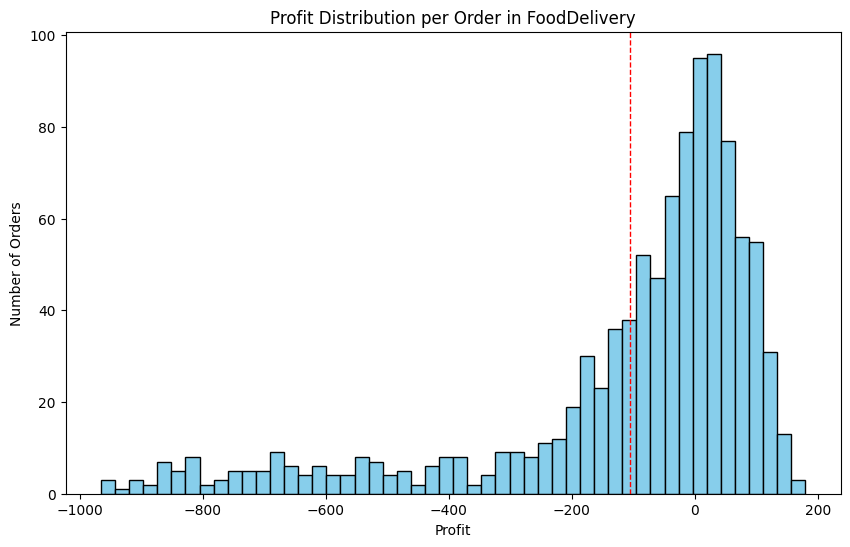

In [33]:
plt.figure(figsize=(10,6))
plt.hist(food_orders["Profit"], bins=50, color="skyblue", edgecolor= "black")
plt.title("Profit Distribution per Order in FoodDelivery")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.axvline(food_orders["Profit"].mean(), color = "red", linestyle = "dashed", linewidth = 1)
plt.show()

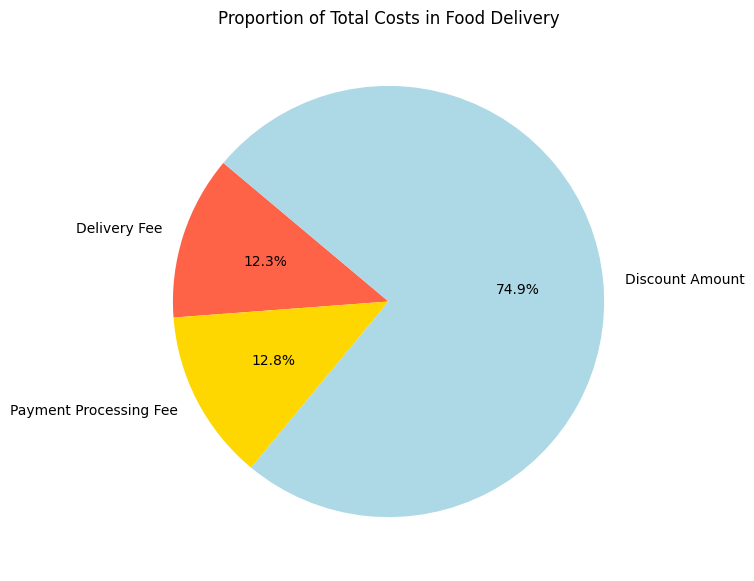

In [36]:
costs_breakdown = food_orders[["Delivery Fee", "Payment Processing Fee", "Discount Amount"]].sum()
plt.figure(figsize = (7, 7))
plt.pie(costs_breakdown, labels = costs_breakdown.index, autopct = "%1.1f%%", startangle = 140, colors = ["tomato", "gold", "lightblue"])
plt.title("Proportion of Total Costs in Food Delivery")
plt.show()

In [37]:
totals = ["Total Revenue", "Total Costs", "Total Profit"]
values = [total_revenue, total_costs, total_profit]


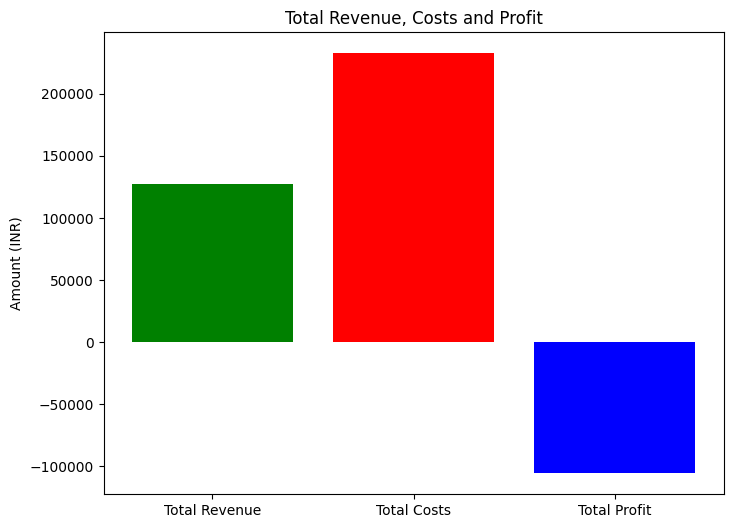

In [38]:
plt.figure(figsize = (8,6))
plt.bar(totals,values, color = ["green","red","blue"])
plt.title("Total Revenue, Costs and Profit")
plt.ylabel("Amount (INR)")
plt.show()

In [39]:
profitable_orders = food_orders[food_orders["Profit"] > 0]
profitable_orders["Commission Percentage"] = (profitable_orders["Commission Fee"] / profitable_orders["Order Value"]) * 100
profitable_orders["Effective Discount Percentage"] = (profitable_orders["Discount Amount"] / profitable_orders["Order Value"]) * 100

new_avg_commision_percentage = profitable_orders["Commission Percentage"].mean()
new_avg_discount_percentage = profitable_orders["Effective Discount Percentage"].mean()

print(new_avg_commision_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


<ipython-input-39-8c302da2db63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders["Commission Percentage"] = (profitable_orders["Commission Fee"] / profitable_orders["Order Value"]) * 100
<ipython-input-39-8c302da2db63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders["Effective Discount Percentage"] = (profitable_orders["Discount Amount"] / profitable_orders["Order Value"]) * 100


In [40]:
recommended_commission_percentage = 30.0
recommended_discount_percentage = 6.0

In [41]:
food_orders["Simulated Commission Fee"] = food_orders["Order Value"] * (recommended_commission_percentage / 100)
food_orders["simulated Discount Amount"] = food_orders["Order Value"] *(recommended_discount_percentage / 100)



In [42]:
food_orders["Simulated Total Costs"] = (food_orders["Delivery Fee"] +
                                        food_orders["Payment Processing Fee"] +
                                        food_orders["simulated Discount Amount"]
                                        )

In [43]:
food_orders["Simulated Profit"] = (food_orders["Simulated Commission Fee"] -
                                   food_orders["Simulated Total Costs"])

In [44]:
import seaborn as sns

In [45]:
plt.figure(figsize = (14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

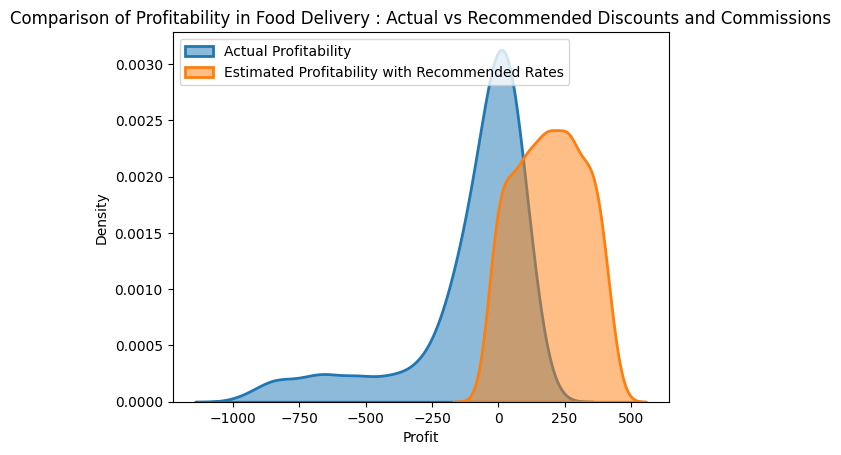

In [47]:
sns.kdeplot(food_orders["Profit"], label = "Actual Profitability", fill = True, alpha=0.5, linewidth=2)
sns.kdeplot(food_orders["Simulated Profit"], label="Estimated Profitability with Recommended Rates", fill=True, alpha=0.5, linewidth=2)
plt.title("Comparison of Profitability in Food Delivery : Actual vs Recommended Discounts and Commissions")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.show()
